# Storytelling: FireWatch 2024 - Monitorando Incêndios e Seca no Brasil

### Introdução

<img src="https://s2-g1.glbimg.com/my6sLG0fqzOTfN3YGquOE4im_o0=/0x0:2500x1667/1008x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2022/k/v/vogAEaQ3GlFP18WWoZBA/gp1szphr-.jpg" width="500">


o Brasil enfrenta uma das maiores crises ambientais de sua história, com quase 50.000 focos de incêndio registrados em todo o país. A seca prolongada e os incêndios florestais afetam mais de 10 milhões de pessoas, principalmente nas regiões Norte e Centro-Oeste, onde a falta de chuvas deixou grandes áreas vulneráveis ao fogo. O impacto econômico é devastador, com prejuízos estimados em R$ 2 bilhões devido aos incêndios e à seca.

Esse projeto, baseado em dados do Instituto Nacional de Pesquisas Espaciais (INPE), baseado nos 3 primeiros trimestres do ano(até então), visa monitorar e entender a relação entre a ausência de chuvas, o risco de incêndios e a energia radiativa dos focos de calor (FRP), ajudando a identificar padrões e propor soluções para mitigar essa crise.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# Carregando os datasets na memória
# 1º Trimestre
df_q1 = pd.read_csv('Dataset_FireWatch_Brazil_Q1_2024.csv')
print(f"Tamanho do dataset 1: {df_q1.shape}")

# 2º Trimestre
df_q2 = pd.read_csv('Dataset_FireWatch_Brazil_Q2_2024.csv')
print(f"Tamanho do dataset 2: {df_q2.shape}")

# 3º Trimestre
df_q3 = pd.read_csv('Dataset_FireWatch_Brazil_Q3_2024.csv')
print(f"Tamanho do dataset 3: {df_q3.shape}")

# Concatenando os três trimestres
df_completo = pd.concat([df_q1, df_q2, df_q3], ignore_index=True)

# Exibindo informações sobre o DataFrame unificado
print(f"\nTamanho do dataset completo: {df_completo.shape}\n")
print(df_completo.info())

Tamanho do dataset 1: (43753, 8)
Tamanho do dataset 2: (48979, 8)
Tamanho do dataset 3: (78517, 8)

Tamanho do dataset completo: (171249, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171249 entries, 0 to 171248
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   data                       171249 non-null  object 
 1   municipio                  171249 non-null  object 
 2   estado                     171249 non-null  object 
 3   bioma                      171248 non-null  object 
 4   avg_numero_dias_sem_chuva  171249 non-null  float64
 5   avg_precipitacao           171249 non-null  float64
 6   avg_risco_fogo             171249 non-null  float64
 7   avg_frp                    171160 non-null  float64
dtypes: float64(4), object(4)
memory usage: 10.5+ MB
None


In [56]:
# Obtendo os tipos de dados do DataFrame completo
typeDados = df_completo.dtypes

# Exibindo cada tipo de dado individualmente com um comentário

# Coluna 'data': (object) — Data da observação.
print(f"data: ({typeDados['data']}) — Data da observação.\n")

# Coluna 'municipio': (object) — Nome do município.
print(f"municipio: ({typeDados['municipio']}) — Nome do município.\n")

# Coluna 'estado': (object) — Estado onde o município está localizado.
print(f"estado: ({typeDados['estado']}) — Estado onde o município está localizado.\n")

# Coluna 'bioma': (object) — Bioma predominante do município (um valor nulo presente).
print(f"bioma: ({typeDados['bioma']}) — Bioma predominante do município (um valor nulo presente).\n")

# Coluna 'avg_numero_dias_sem_chuva': (float64) — Média de dias sem chuva.
print(f"avg_numero_dias_sem_chuva: ({typeDados['avg_numero_dias_sem_chuva']}) — Média de dias sem chuva.\n")

# Coluna 'avg_precipitacao': (float64) — Média de precipitação (em mm).
print(f"avg_precipitacao: ({typeDados['avg_precipitacao']}) — Média de precipitação (em mm).\n")

# Coluna 'avg_risco_fogo': (float64) — Média de risco de fogo.
print(f"avg_risco_fogo: ({typeDados['avg_risco_fogo']}) — Média de risco de fogo.\n")

# Coluna 'avg_frp': (float64) — Média de energia radiativa de fogo (FRP).
print(f"avg_frp: ({typeDados['avg_frp']}) — Média de energia radiativa de fogo (FRP).\n")

data: (object) — Data da observação.

municipio: (object) — Nome do município.

estado: (object) — Estado onde o município está localizado.

bioma: (object) — Bioma predominante do município (um valor nulo presente).

avg_numero_dias_sem_chuva: (float64) — Média de dias sem chuva.

avg_precipitacao: (float64) — Média de precipitação (em mm).

avg_risco_fogo: (float64) — Média de risco de fogo.

avg_frp: (float64) — Média de energia radiativa de fogo (FRP).



In [57]:
duplicates = df_completo.duplicated().sum()
print(f"Número de duplicatas no dataset completo: {duplicates}")

Número de duplicatas no dataset completo: 0


Valores faltantes por coluna:
data                          0
municipio                     0
estado                        0
bioma                         1
avg_numero_dias_sem_chuva     0
avg_precipitacao              0
avg_risco_fogo                0
avg_frp                      89
dtype: int64


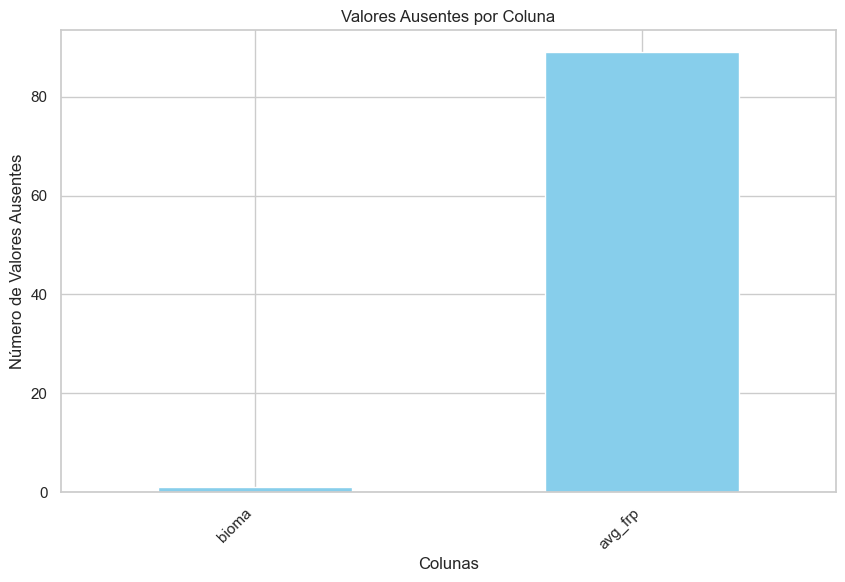

In [61]:
missing_values = df_completo.isnull().sum()
print("Valores faltantes por coluna:")
print(missing_values)

#Separando
missing_data = missing_values[missing_values > 0]

plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='skyblue')
plt.title('Valores Ausentes por Coluna')
plt.ylabel('Número de Valores Ausentes')
plt.xlabel('Colunas')
plt.xticks(rotation=45, ha='right')
plt.show()


In [63]:
# Estatísticas descritivas básicas
print(df_completo.describe())

       avg_numero_dias_sem_chuva  avg_precipitacao  avg_risco_fogo  \
count              171249.000000     171249.000000   171249.000000   
mean                   23.176133        100.829799       55.190840   
std                    30.655699        458.803679       42.796038   
min                     0.000000          0.000000        0.000000   
25%                     2.000000          0.000000        3.500000   
50%                     8.710000          0.000000       66.000000   
75%                    32.750000          0.000000      100.000000   
max                   120.000000      25298.000000      100.000000   

             avg_frp  
count  171160.000000  
mean      117.577072  
std       199.384446  
min         0.000000  
25%        27.287500  
50%        56.000000  
75%       110.500000  
max      9300.570000  


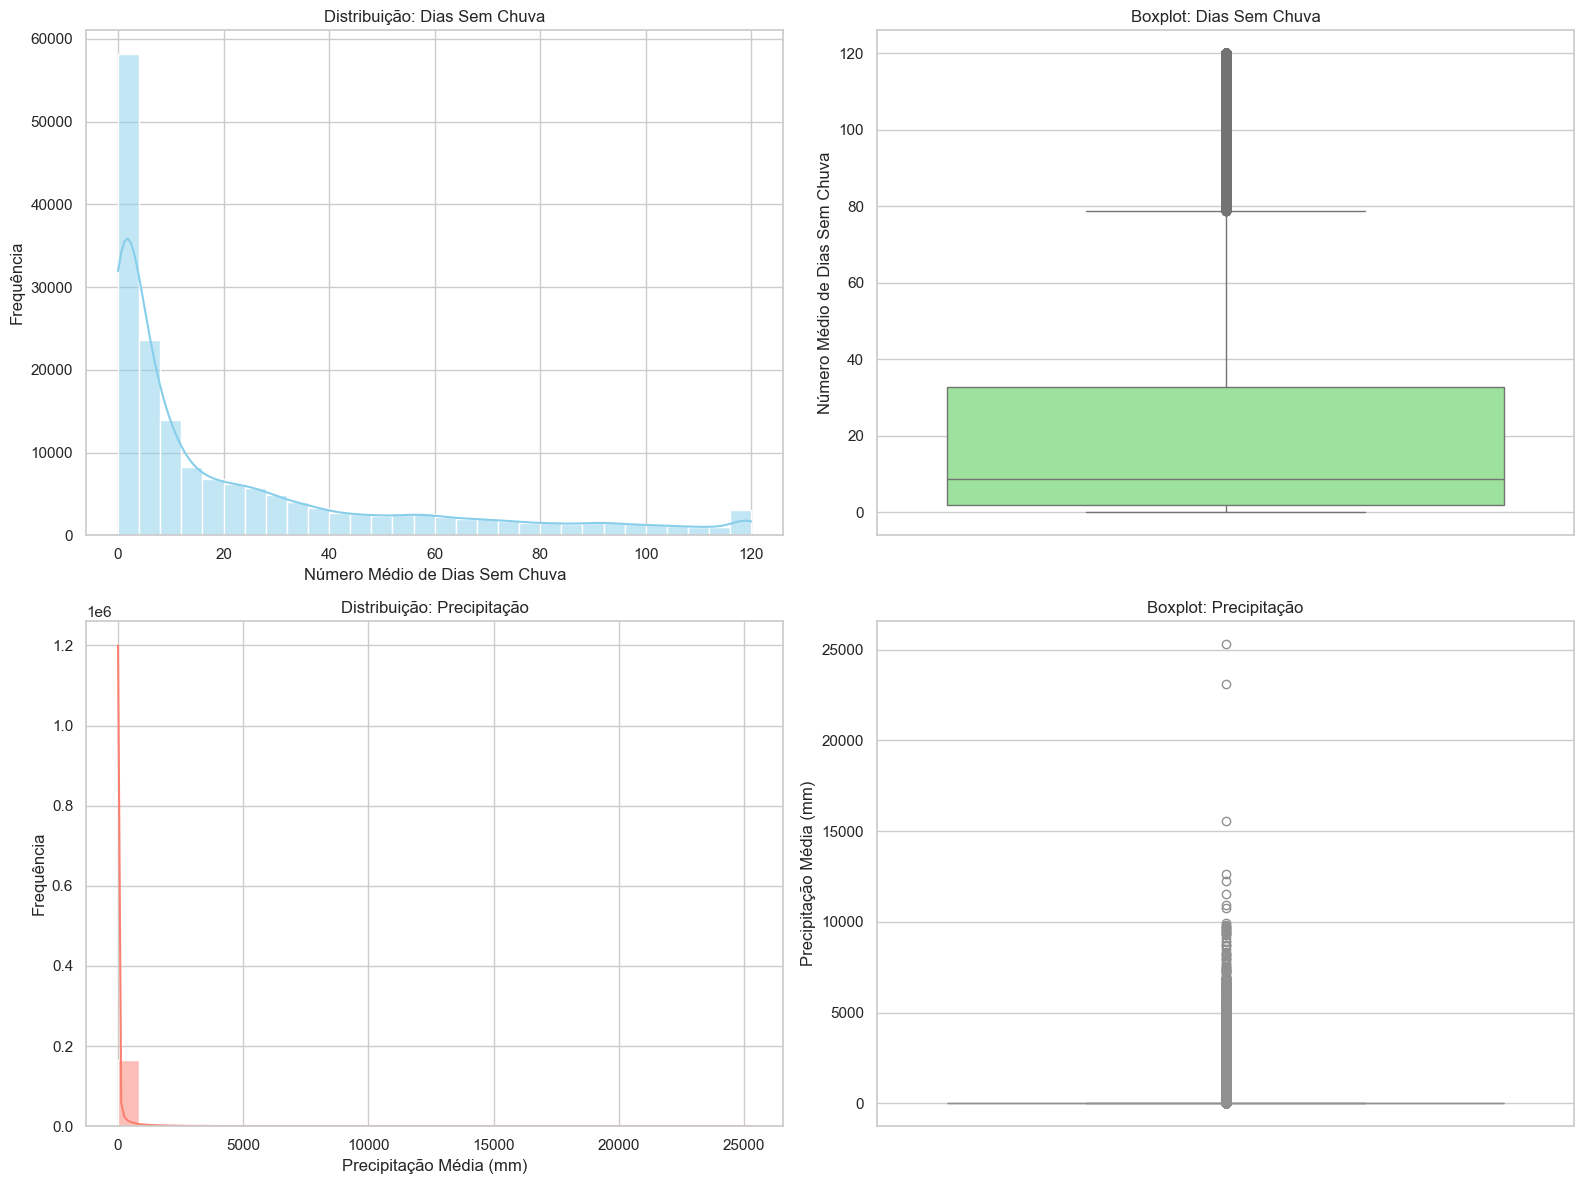

In [65]:
# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Criando os subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma e KDE para avg_numero_dias_sem_chuva
sns.histplot(df_completo['avg_numero_dias_sem_chuva'], kde=True, ax=axes[0, 0], color='skyblue', bins=30)
axes[0, 0].set_title('Distribuição: Dias Sem Chuva')
axes[0, 0].set_xlabel('Número Médio de Dias Sem Chuva')
axes[0, 0].set_ylabel('Frequência')

# Boxplot para avg_numero_dias_sem_chuva
sns.boxplot(data=df_completo['avg_numero_dias_sem_chuva'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Boxplot: Dias Sem Chuva')
axes[0, 1].set_ylabel('Número Médio de Dias Sem Chuva')

# Histograma e KDE para avg_precipitacao
sns.histplot(df_completo['avg_precipitacao'], kde=True, ax=axes[1, 0], color='salmon', bins=30)
axes[1, 0].set_title('Distribuição: Precipitação')
axes[1, 0].set_xlabel('Precipitação Média (mm)')
axes[1, 0].set_ylabel('Frequência')

# Boxplot para avg_precipitacao
sns.boxplot(data=df_completo['avg_precipitacao'], ax=axes[1, 1], color='lightyellow')
axes[1, 1].set_title('Boxplot: Precipitação')
axes[1, 1].set_ylabel('Precipitação Média (mm)')

# Ajustando o layout
plt.tight_layout()
plt.show()


### 1. **Histograma e KDE (Dias Sem Chuva)**
   - **Histograma**: Mostra a distribuição do número médio de dias sem chuva. Os intervalos (bins) representam a frequência de dias em cada faixa, permitindo visualizar como os dados estão distribuídos. 
     - **Análise**: Identificamos a moda (valor mais frequente), a simetria ou assimetria da distribuição (à esquerda, se é mais concentrada ou à direita, menos concentrada), e a presença de outliers (valores extremos).
   - **KDE (Kernel Density Estimate)**: É uma estimativa suave da função de densidade de probabilidade dos dados. 
     - **Análise**: Ajuda a entender a forma geral da distribuição de forma mais contínua, o que pode revelar características que não são visíveis apenas no histograma.

### 2. **Boxplot (Dias Sem Chuva)**
   - **Boxplot**: Representa a mediana, quartis e possíveis outliers dos dados.
     - **Análise**: A linha dentro da caixa representa a mediana, enquanto os limites da caixa são os quartis (Q1 e Q3). Os "bigodes" se estendem até os valores mínimos e máximos, exceto os outliers, que são representados como pontos individuais. Esse gráfico ajuda a identificar a variabilidade dos dados e possíveis outliers.

### 3. **Histograma e KDE (Precipitação)**
   - **Histograma**: Mostra a distribuição da precipitação média em milímetros. 
     - **Análise**: Assim como o primeiro histograma, podemos observar a frequência de valores de precipitação, identificar a moda e avaliar a forma da distribuição.
   - **KDE**: Representa a suavização da distribuição da precipitação média.
     - **Análise**: A curva de densidade revela a forma da distribuição de forma contínua, ajudando a identificar picos e intervalos de concentração de dados.

### 4. **Boxplot (Precipitação)**
   - **Boxplot**: Representa a mediana, quartis e outliers da precipitação média.
     - **Análise**: Similar ao boxplot de dias sem chuva, podemos observar a mediana e a variabilidade da precipitação. Os outliers, que podem indicar eventos extremos de precipitação, são claramente destacados. Este gráfico é crucial para entender a dispersão e a presença de valores atípicos em relação à precipitação.

                 estado  total_queimadas
0          MINAS GERAIS             7664
1             SÃO PAULO             5406
2           MATO GROSSO             5256
3                 BAHIA             3786
4             TOCANTINS             3669
5                 GOIÁS             3105
6              MARANHÃO             2823
7                PARANÁ             2447
8                  PARÁ             2383
9    MATO GROSSO DO SUL             2139
10                PIAUÍ             1492
11       RIO DE JANEIRO             1407
12       SANTA CATARINA              956
13             RONDÔNIA              881
14             AMAZONAS              876
15       ESPÍRITO SANTO              860
16    RIO GRANDE DO SUL              623
17           PERNAMBUCO              599
18                 ACRE              556
19                CEARÁ              381
20              RORAIMA              352
21              ALAGOAS              253
22              PARAÍBA              247
23  RIO GRANDE D

C:\Users\victo\AppData\Local\Temp\ipykernel_3304\3905130000.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_queimadas_por_estado, x='total_queimadas', y='estado', palette='viridis')


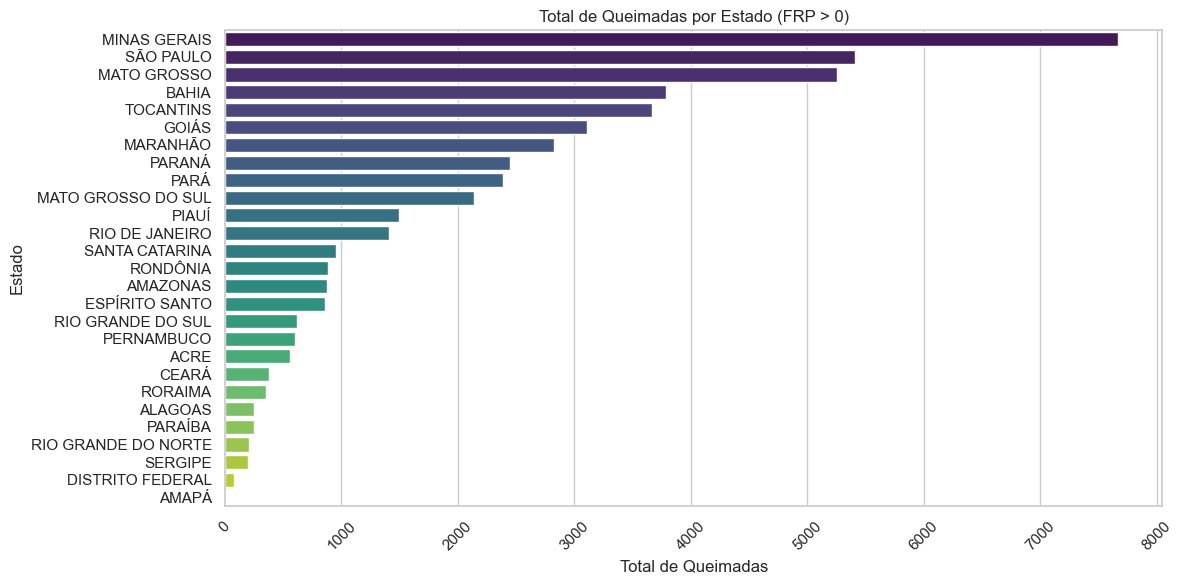

In [101]:
#df_completo = pd.concat([df_q1, df_q2, df_q3], ignore_index=True) 

# Filtrar os dados para incluir apenas os registros com FRP > 0
df_frp_positivo = df_q2[df_q2['avg_frp'] > 0.0]

# Contar a quantidade total de registros por estado onde avg_frp > 0
total_queimadas_por_estado = df_frp_positivo['estado'].value_counts().reset_index()
total_queimadas_por_estado.columns = ['estado', 'total_queimadas']

# Exibir a quantidade total de queimadas por estado
print(total_queimadas_por_estado)

# Plotar a distribuição do total de queimadas por estado
plt.figure(figsize=(12, 6))
sns.barplot(data=total_queimadas_por_estado, x='total_queimadas', y='estado', palette='viridis')
plt.title('Total de Queimadas por Estado (FRP > 0)')
plt.xlabel('Total de Queimadas')
plt.ylabel('Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


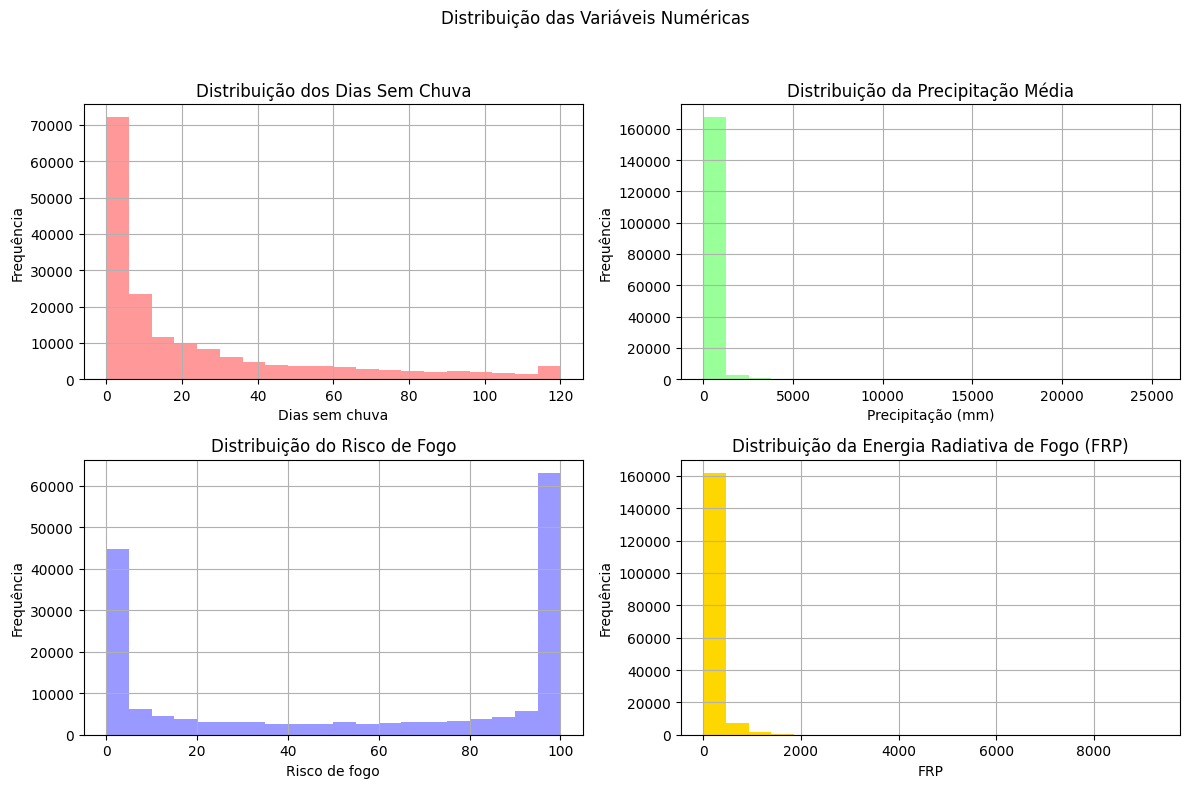

In [7]:
# Definindo cores para os gráficos
cores = ['#FF9999', '#99FF99', '#9999FF', '#FFD700']

# Criando o histograma com cores diferentes e legendas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plotando cada variável numérica em um subplot separado
df_completo['avg_numero_dias_sem_chuva'].hist(bins=20, ax=axes[0, 0], color=cores[0])
axes[0, 0].set_title('Distribuição dos Dias Sem Chuva')
axes[0, 0].set_xlabel('Dias sem chuva')
axes[0, 0].set_ylabel('Frequência')

df_completo['avg_precipitacao'].hist(bins=20, ax=axes[0, 1], color=cores[1])
axes[0, 1].set_title('Distribuição da Precipitação Média')
axes[0, 1].set_xlabel('Precipitação (mm)')
axes[0, 1].set_ylabel('Frequência')

df_completo['avg_risco_fogo'].hist(bins=20, ax=axes[1, 0], color=cores[2])
axes[1, 0].set_title('Distribuição do Risco de Fogo')
axes[1, 0].set_xlabel('Risco de fogo')
axes[1, 0].set_ylabel('Frequência')

df_completo['avg_frp'].hist(bins=20, ax=axes[1, 1], color=cores[3])
axes[1, 1].set_title('Distribuição da Energia Radiativa de Fogo (FRP)')
axes[1, 1].set_xlabel('FRP')
axes[1, 1].set_ylabel('Frequência')

# Ajustar o layout e adicionar um título principal
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta para evitar sobreposição do título principal
plt.show()


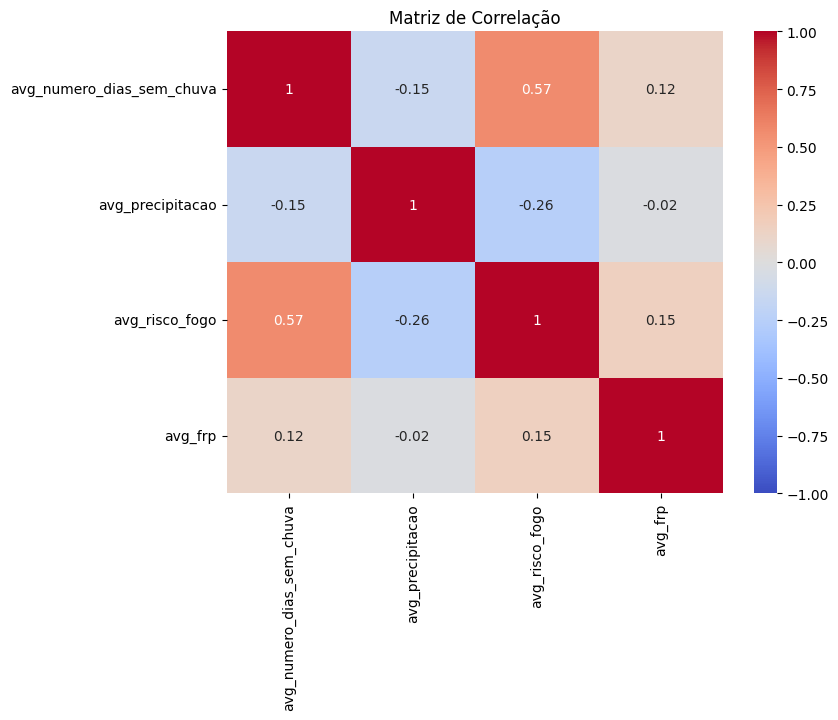

In [8]:
# Matriz de correlação
correlation_matrix = df_completo[['avg_numero_dias_sem_chuva', 'avg_precipitacao', 'avg_risco_fogo', 'avg_frp']].corr()

# Exibir o heatmap de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()


In [42]:
# Análise por bioma e estado
top_biomas_risco_fogo = df_completo.groupby('bioma')['avg_risco_fogo'].mean().sort_values(ascending=False).head(3)
top_estados_risco_fogo = df_completo.groupby('estado')['avg_risco_fogo'].mean().sort_values(ascending=False).head(3)

top_biomas_frp = df_completo.groupby('bioma')['avg_frp'].mean().sort_values(ascending=False).head(3)
top_estados_frp = df_completo.groupby('estado')['avg_frp'].mean().sort_values(ascending=False).head(3)

# Exibindo os resultados
print("Top 3 Biomas por Risco de Fogo:")
print(top_biomas_risco_fogo)

print("\nTop 3 Estados por Risco de Fogo:")
print(top_estados_risco_fogo)

print("\nTop 3 Biomas por FRP (Energia Radiativa):")
print(top_biomas_frp)

print("\nTop 3 Estados por FRP (Energia Radiativa):")
print(top_estados_frp)

Top 3 Biomas por Risco de Fogo:
bioma
Cerrado           60.749212
Mata Atlântica    59.921848
Caatinga          54.467247
Name: avg_risco_fogo, dtype: float64

Top 3 Estados por Risco de Fogo:
estado
RIO DE JANEIRO    70.250707
ESPÍRITO SANTO    69.473068
ALAGOAS           69.334776
Name: avg_risco_fogo, dtype: float64

Top 3 Biomas por FRP (Energia Radiativa):
bioma
Pantanal    275.173741
Cerrado     136.151630
Amazônia    129.894415
Name: avg_frp, dtype: float64

Top 3 Estados por FRP (Energia Radiativa):
estado
ALAGOAS        274.316787
RORAIMA        201.738751
MATO GROSSO    172.194455
Name: avg_frp, dtype: float64


### Explicação dos Outliers

Na análise de outliers, os valores que se destacam muito dos demais podem indicar dados atípicos, erros de medição ou fenômenos extremos. Vamos detalhar os dois outliers principais com base na análise de risco de fogo e energia radiativa (FRP).

#### 1. **Outliers no Risco de Fogo (avg_risco_fogo)**

**Top 3 Biomas por Risco de Fogo:**
- **Cerrado:** 60.75
- **Mata Atlântica:** 59.92
- **Caatinga:** 54.47

**Top 3 Estados por Risco de Fogo:**
- **Rio de Janeiro:** 70.25
- **Espírito Santo:** 69.47
- **Alagoas:** 69.33

Os **estados do Rio de Janeiro e Espírito Santo** têm um risco de fogo elevado (acima de 70), valores significativamente superiores à média geral para outros biomas e regiões. Esses valores podem ser considerados **outliers** em relação aos demais biomas e estados, indicando que essas regiões podem estar passando por **situações críticas de seca** ou apresentando alta vulnerabilidade a incêndios florestais.

- **Rio de Janeiro e Espírito Santo**: Esses estados, embora estejam na Mata Atlântica, possuem regiões de clima seco e histórico de temperaturas elevadas, o que aumenta o risco de incêndios. A geografia acidentada e a urbanização nas áreas florestais podem agravar a vulnerabilidade ao fogo.
  
Esses valores elevados sugerem a necessidade de **monitoramento constante** e **medidas preventivas** para controlar incêndios em ambas as regiões.

#### 2. **Outliers na Energia Radiativa (avg_frp)**

**Top 3 Biomas por Energia Radiativa (FRP):**
- **Pantanal:** 275.17
- **Cerrado:** 136.15
- **Amazônia:** 129.89

**Top 3 Estados por Energia Radiativa (FRP):**
- **Alagoas:** 274.32
- **Roraima:** 201.74
- **Mato Grosso:** 172.19

Os dados de **Alagoas e Pantanal** se destacam com valores de **energia radiativa muito elevados** (acima de 270 para ambos). Esses valores indicam a emissão de energia associada ao fogo e à queima de biomassa. Esses são valores bem acima da média para outras regiões e indicam **grandes eventos de queima ou incêndios florestais** de larga escala.

- **Pantanal:** A energia radiativa elevada reflete a situação de incêndios que afetam o bioma durante a estação seca, exacerbada pela vegetação densa e as condições climáticas. O Pantanal é suscetível a incêndios que liberam grandes quantidades de energia, sendo considerado um ponto crítico.

- **Alagoas:** Mesmo sendo um estado de pequena extensão, o valor elevado de FRP indica a presença de **queimadas intensas**, o que pode estar relacionado à seca prolongada ou práticas agrícolas com o uso de fogo.

Esses outliers mostram a gravidade da situação nessas regiões e sugerem a necessidade de **ações preventivas** para evitar desastres ambientais, além de um planejamento eficaz de combate a incêndios.

### Tratamento para Dados Atípicos

1. **Verificação da Fonte de Dados:** É importante confirmar a origem e a acurácia dos dados, especialmente os extremos, para descartar erros de medição ou inconsistências no registro.
   
2. **Análise Contextual:** Avaliar fatores climáticos ou socioambientais que poderiam justificar esses valores, como secas, desmatamentos ou queimadas ilegais.

3. **Medidas de Controle:** Implementar políticas de controle de fogo e incêndios em áreas vulneráveis, além de monitoramento constante em períodos de maior risco.

Essas análises indicam a importância de políticas ambientais robustas e de medidas proativas para mitigar os riscos associados ao fogo nessas regiões.